# The Iris classification problem
* Imagine you are a botanist seeking an automated way to categorize each Iris flower you find. Machine learning provides many algorithms to classify flowers statistically. For instance, a sophisticated machine learning program could classify flowers based on photographs. Our ambitions are more modest—we're going to classify Iris flowers based on the length and width measurements of their sepals and petals.

* The Iris genus entails about 300 species, but our program will only classify the following three:

1. Iris setosa
2. Iris virginica
3. Iris versicolor
Petal geometry compared for three iris species: Iris setosa, Iris virginica, and Iris versicolor
Figure 1. Iris setosa (by Radomil, CC BY-SA 3.0), Iris versicolor, (by Dlanglois, CC BY-SA 3.0), and Iris virginica (by Frank Mayfield, CC BY-SA 2.0).
 
 
 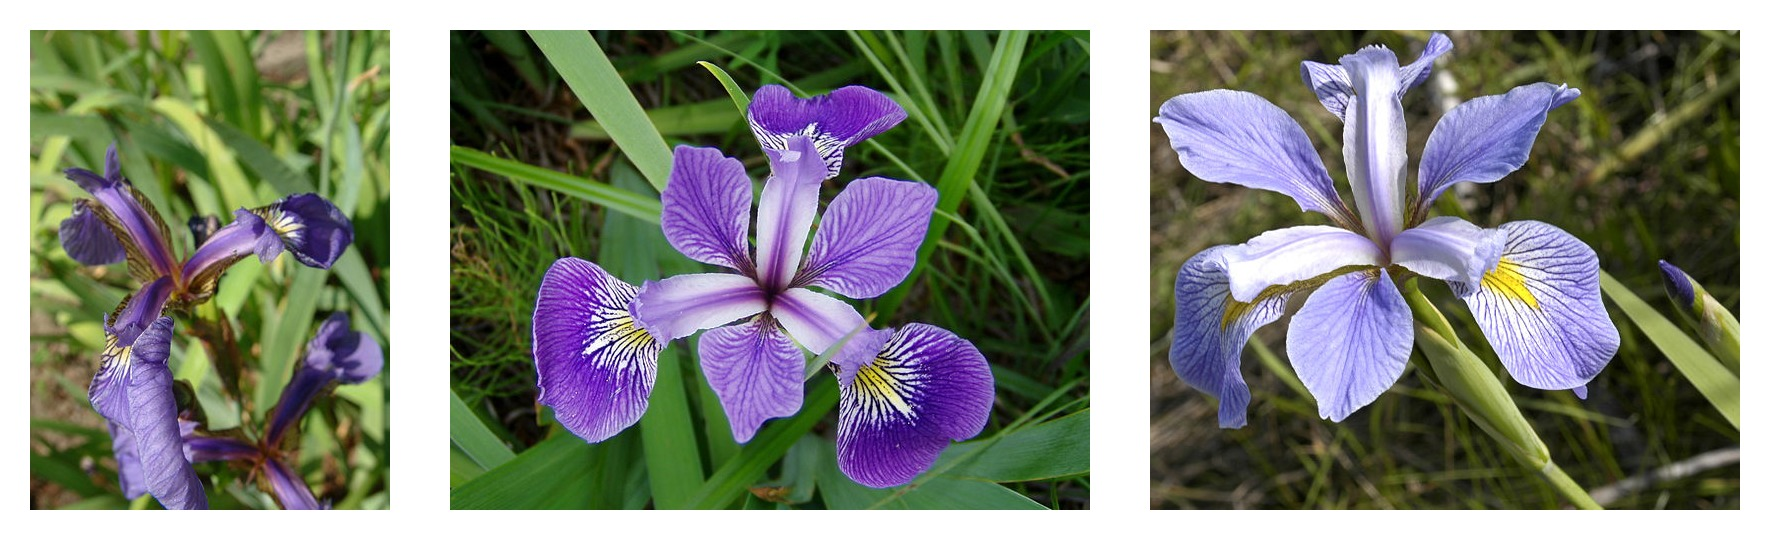
 
Fortunately, someone has already created a data set of 150 Iris flowers with the sepal and petal measurements. 
This is a classic dataset that is popular for beginner machine learning classification problems.

# 1. Prepare Problem
1. Load libraries
2. Load dataset

## 1.1 Import Libraries

In [250]:
# Load Libraries
import warnings
warnings.filterwarnings('ignore')


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC


%matplotlib inline

In [251]:
# Python Project Template

# 1. Prepare Problem
# a) Load libraries
# b) Load dataset

# 2. Summarize Data
# a) Descriptive statistics
# b) Data visualizations

# 3. Prepare Data
# a) Data Cleaning
# b) Feature Selection
# c) Data Transforms

# 4. Evaluate Algorithms
# a) Split-out validation dataset
# b) Test options and evaluation metric
# c) Spot Check Algorithms
# d) Compare Algorithms

# 5. Improve Accuracy
# a) Algorithm Tuning
# b) Ensembles

# 6. Finalize Model
# a) Predictions on validation dataset
# b) Create standalone model on entire training dataset
# c) Save model for later use

## 1.2 Load Dataset

In [252]:
# Load dataset
filename = 'iris_data.csv'
# names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
df = pd.read_csv(filename)

# 2. Summarize the Dataset
## 2.a) Descriptive statistics
1. Dimensions of the dataset.
2. Peek at the data itself.
3. Statistical summary of all attributes.
4. Breakdown of the data by the class variable.

## 2.b) Data visualizations


### 2.a.1) Dimensions of dataset

In [253]:
# 1. Dimensions of dataset
print(df.shape)

(150, 5)


### 2.a.2) Peek at the data

In [254]:
# 2. Peek at the data
df.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### 2.a.3) Statistical Summary

In [255]:
# 3. Statistical summary of all attributes.
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### 2.a.4) Class Distribution

In [256]:
# 4. Breakdown of the data by the class variable. 
#i.e Class Distribution
# df.class.value_counts

df.groupby('species').size()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

###  Observations
* There are 150 observations with 4 features each (sepal length, sepal width, petal length, petal width).
* There are no null values, so we don't have to worry about that.
* There are 50 observations of each species (setosa, versicolor, virginica).

## 2.b) Data Visualization

### 2.b.1) Univariate Plots

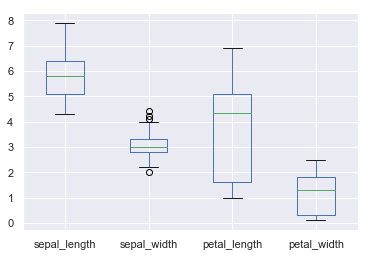

In [257]:
# df.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)

# box and whisker plots
df.plot(kind='box', sharex=False, sharey=False)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x13b3dc7f0>,
      dtype=object)

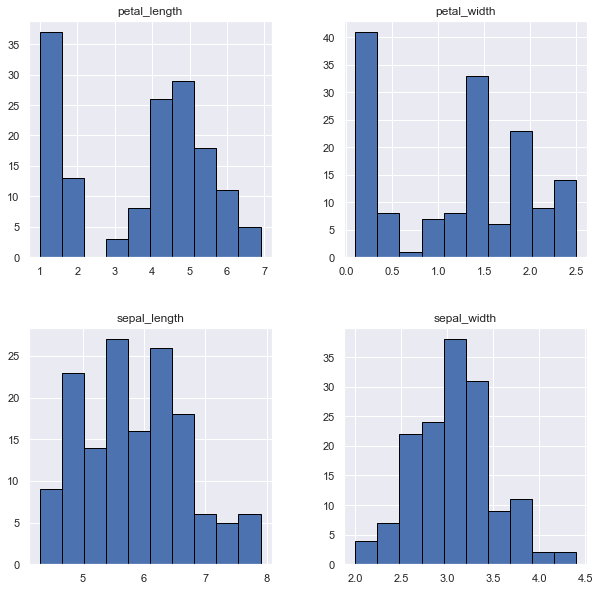

In [258]:
# histograms
df.hist(edgecolor='black', linewidth=1, figsize=(10,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x13cbee128>,
      dtype=object)

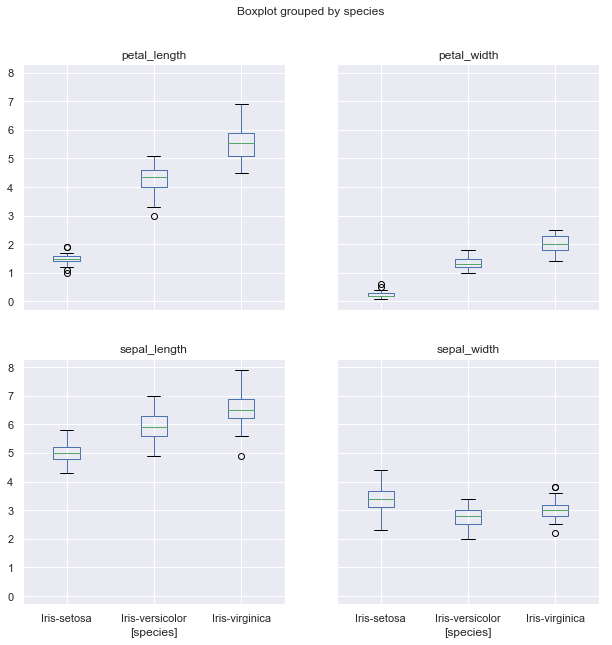

In [259]:
# boxplot on each feature split out by species
df.boxplot(by="species",figsize=(10,10))

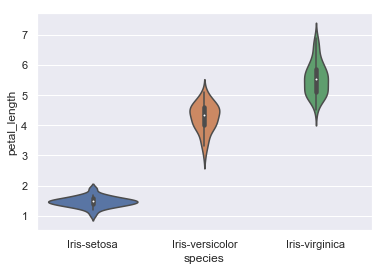

In [260]:
# violinplots on petal-length for each species
sns.violinplot(data=df,x="species", y="petal_length")

### 2.b.2) Multivariate Plots

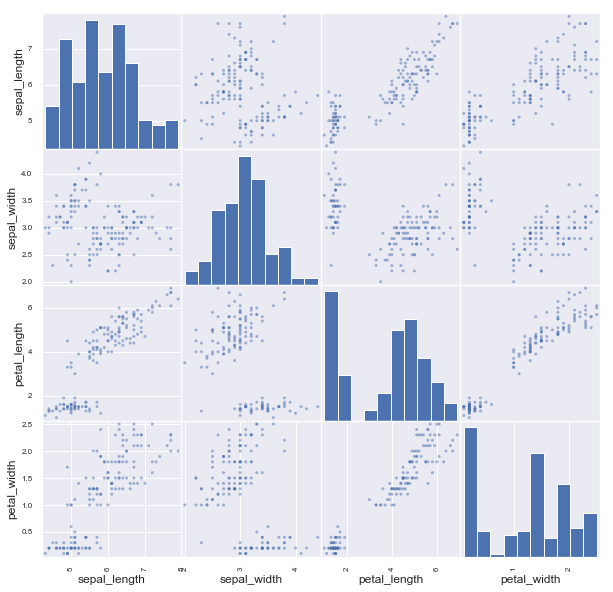

In [261]:
from pandas.plotting import scatter_matrix
# scatter plot matrix
scatter_matrix(df,figsize=(10,10))
plt.show()

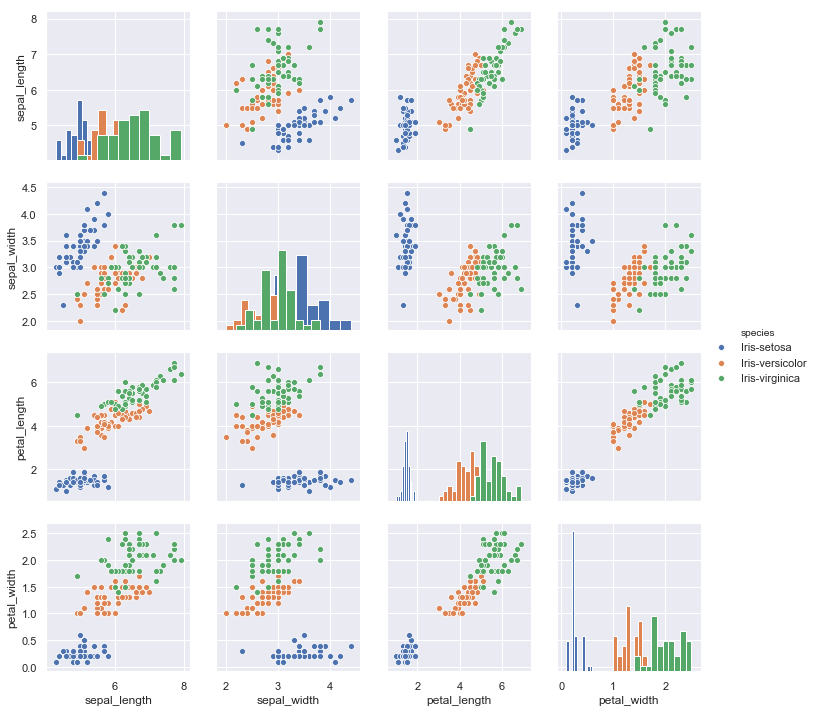

In [262]:
# Using seaborn pairplot to see the bivariate relation between each pair of features
sns.pairplot(df, hue="species", diag_kind='hist')

* From the plot, we can see that the species setosa is well separataed from others in all combinations.
* We can also replace the histograms shown in the diagonal of the pairplot by kde.

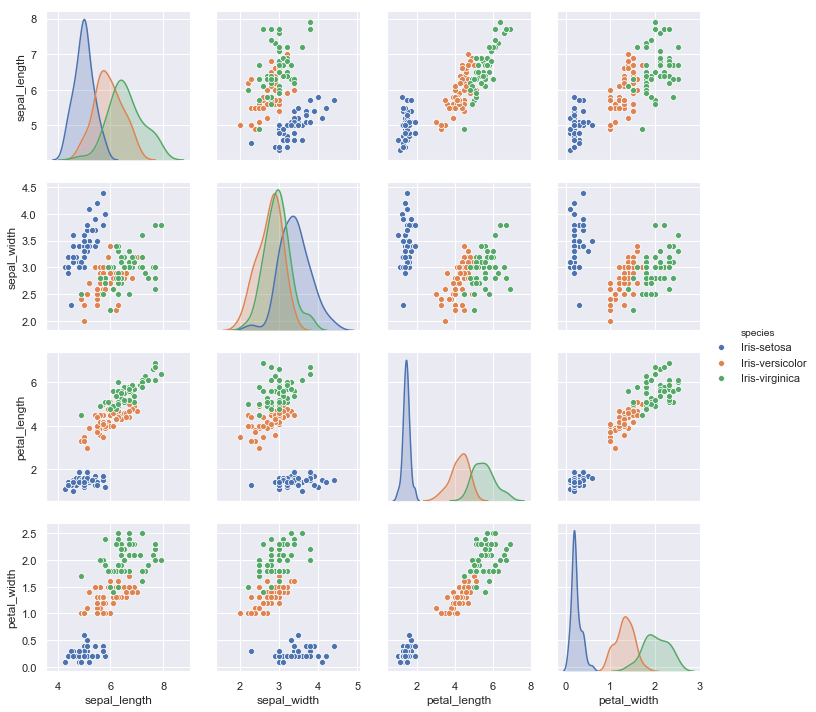

In [263]:
sns.pairplot(df, hue="species", diag_kind='kde')

# 3. Prepare Data

1. a) Data Cleaning
2. b) Feature Selection
3. c) Data Transforms

#  4. Evaluate Algorithms
1. a) Split-out validation dataset
2. b) Test options and evaluation metric
3. c) Spot Check Algorithms
4. d) Compare Algorithms

## 4.1 Split-out validation dataset

In [264]:
y = df['species']
X = df.drop(['species'], axis=1)
# print(X)
validation_size = 0.20
seed = 1
X_train, X_val, Y_train, Y_val = train_test_split(X, y, test_size=validation_size, random_state=seed)

In [265]:
# data is already cleaned

# standardizing our dataset so that all columns will have value between -1 to 1

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

sc.fit(X_train)

X_train_std = sc.transform(X_train)
X_val_std = sc.transform(X_val)


print('After standardizing our features, the first 5 rows of our data now look like this:\n')
pd.DataFrame(X_train_std, columns=X_train.columns).head()

After standardizing our features, the first 5 rows of our data now look like this:



,sepal_length,sepal_width,petal_length,petal_width
0,0.315537,-0.036122,0.447486,0.234531
1,2.244933,-0.036122,1.298040,1.396429
2,-0.287400,-1.240184,0.050561,-0.152768
3,0.677298,-0.517747,1.014522,1.138229
4,-0.046225,-0.517747,0.731004,1.525529


## 4.2 Test Harness
* We will use 10-fold cross validation to estimate accuracy. This will split our dataset into 10 parts, train on 9 and test on 1 and repeat for all combinations of train-test splits. We are using the metric of accuracy to evaluate models. This is a ratio of the number of correctly predicted instances divided by the total number of instances in the dataset multiplied by 100 to give a percentage (e.g. 95% accurate). We will be using the scoring variable when we run build and evaluate each model next.

## 4.3 Spot Check Algorithms
* Logistic Regression (LR).
* Linear Discriminant Analysis (LDA).
* k-Nearest Neighbors (KNN).
* Classification and Regression Trees (CART). 􏰀 Gaussian Naive Bayes (NB).
* Support Vector Machines (SVM).

In [266]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=10, random_state=seed)
    cv_results = cross_val_score(model, X_train_std, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = '{} {} {}'.format(name, cv_results.mean(), cv_results.std())
    print(msg)

LR 0.8916666666666666 0.09166666666666666
LDA 0.9749999999999999 0.03818813079129868
KNN 0.9499999999999998 0.05527707983925667
CART 0.9249999999999998 0.07861650943380503
NB 0.9416666666666667 0.06508541396588878
SVM 0.9583333333333333 0.05590169943749474


## 4.4 Compare Algorithms

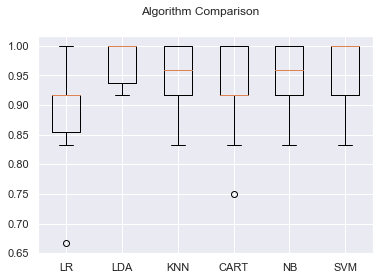

In [267]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

# 5. Improve Accuracy
* a) Algorithm Tuning
* b) Ensembles


# 6. Finalize Model
* a) Predictions on validation dataset
* b) Create standalone model on entire training dataset
* c) Save model for later use

In [268]:
knn = KNeighborsClassifier()
knn.fit(X_train_std, Y_train)
predictions = knn.predict(X_val_std)

print(confusion_matrix(Y_val, predictions))
print(classification_report(Y_val, predictions))

# Accuracy score
print('The accuracy of the knn classifier on test data is {:.2f} out of 1'.format(accuracy_score(Y_val, predictions)))


[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.86      1.00      0.92         6

      micro avg       0.97      0.97      0.97        30
      macro avg       0.95      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30

The accuracy of the knn classifier on test data is 0.97 out of 1


In [273]:
svm = SVC()
svm.fit(X_train_std, Y_train)
predictions = svm.predict(X_val_std)
print(confusion_matrix(Y_val, predictions))
print(classification_report(Y_val, predictions))
      
# Accuracy score
print('The accuracy of the svm classifier on test data is {:.2f} out of 1'.format(accuracy_score(Y_val, predictions)))

[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.86      1.00      0.92         6

      micro avg       0.97      0.97      0.97        30
      macro avg       0.95      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30

The accuracy of the svm classifier on test data is 0.97 out of 1


## 6.3 Save model for later use


In [270]:
from pickle import dump
from pickle import load

In [274]:
filename = 'iris_svm.sav'
dump(svm, open(filename, 'wb'))

In [278]:
# load the model from disk
loaded_model = load(open(filename, 'rb')) 
predictions = loaded_model.predict(X_val_std)
print('The accuracy of the svm classifier on test data is {:.2f} out of 1'.format(accuracy_score(Y_val, predictions)))

The accuracy of the svm classifier on test data is 0.97 out of 1
